--------------------------------------------
# **Medicon Dose Testing**
--------------------------------------------

--------------------
## **Context** 
--------------------

Medicon, a pharmaceutical company, has manufactured the sixth batch (40,000 units) of COVID-19 vaccine doses. **This vaccine was clinically tested last quarter and around 200,000 doses have already been given to people in five batches.**

Now, the sixth batch of doses needs to be tested for their **time of effect** (measured as the **time taken for the dose to be absorbed in the body for its COVID-19 preventative effects** such as antibody creation, to manifest), as well as for **quality assurance** (which tells you whether the dose will be able to do a satisfactory job or not).

You are working with the quality assurance team of Medicon and want to understand the quality of the sixth batch so that the company can plan for the next batch of doses. 

**Note:** Please note that this is not a clinical trial, the vaccine has already cleared clinical trials. This test is to ensure the quality and effectiveness of the sixth batch.

------------------------
## **Objective** 
------------------------

The previous analysis found that a dose is ten times more likely to produce a satisfactory result than not.

<br>

**Note:** Here, a satisfactory job for the vaccine means that the dose **has successfully prevented COVID-19** - which is assumed to have taken place if the person does not show any symptoms or side effects after 14 days have passed since the vaccine dose was administered.


<br>

Q1. The quality assurance team has collected 100 volunteers who were ready for the trial of this new batch, and they have given one dose to each volunteer. Help the team answer the following questions:


a) **Plot the probability distribution** for the number of unsatisfactory doses.

b) What is the probability that **exactly 3 doses will not do a satisfactory job**?

c) What is the probability that **at most 3 doses will not do a satisfactory job** out of 100 selected?


<br>

Q2. The New York city administration wants to buy 200 doses for Healthcare workers who tested positive for COVID-19. They have contacted the company and requested 200 doses. What is the probability that **at least 30 doses will not do a satisfactory job** out of 200 doses?

<br>

Q3. The quality assurance team wants to analyze the **time of effect for doses**. So, they have enlisted help from 50 volunteers with the assistance of the city administration, and gave one dose to each volunteer. Data for these 50 doses are in the 'doses.csv' file. Based on this sample, answer the following questions:

a) What is the probability that the time of effect is **less than 11.5 hours**?

b) What is the **90th percentile of time of effect for the doses**?

c) For the effectiveness test of the vaccine, estimate the **range which will contain the population mean (time of effect) with a 95% confidence level.**

## **Importing the necessary libraries**

In [1]:
# Import the important libraries
import pandas as pd  # Library used for data manipulation and analysis
import numpy as np  # LIbrary used for working with arrays
import matplotlib.pyplot as plt  # Library for visualization
import seaborn as sns  # Library for visualization

%matplotlib inline

import scipy.stats as stats  # This library contains statistical functions

In [2]:
# Global variables
suptitle_param = dict(color='darkslategray', weight='bold', fontsize='x-large')

## **Question 1**

Q1. The quality assurance team has collected 100 volunteers who were ready for the trial of this new batch, and they have given one dose to each volunteer. Help the team answer the following questions:


- a) **Plot the probability distribution** for the number of unsatisfactory doses.
- b) What is the probability that **exactly 3 doses will not do a satisfactory job**?
- c) What is the probability that **at most 3 doses will not do a satisfactory job** out of 100 selected?

In [3]:
# What information we have?
# The previous analysis found that a dose is ten times more likely to produce a satisfactory result 
# than not.
# 10p + p = 1 ==> 11p = 1 ==> p = 1/11
p_success = 10/11
p_failure = 1/11
print(f"""
Probability of success: {p_success} 
Probability of failure: {p_failure}
""")


Probability of success: 0.9090909090909091 
Probability of failure: 0.09090909090909091



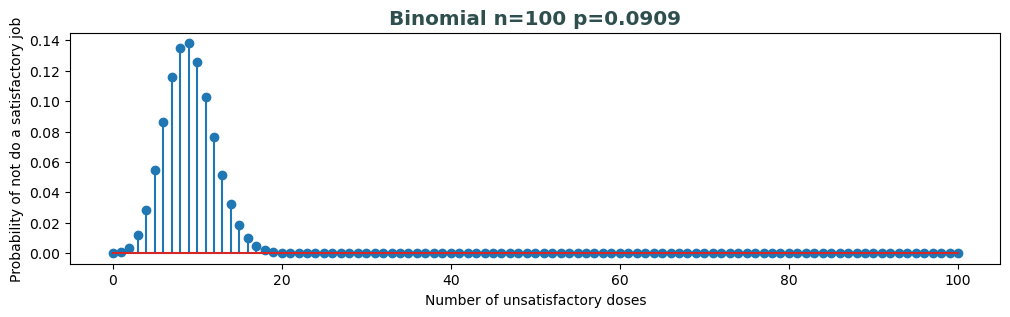

In [4]:
# a) Plot the probability distribution for the number of unsatisfactory doses.
n = 100
p = p_failure
binomial = stats.binom(n=n, p=p)

events = np.arange(0, n+1)
probabilities = binomial.pmf(events)

# PMF representation
fig = plt.figure(figsize=(12, 3))
plt.stem(events, probabilities, 'C0-')
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability of not do a satisfactory job')
plt.title(f"Binomial n={n} p={p:.4f}", **suptitle_param)
plt.show()

In [5]:
# b) What is the probability that exactly 3 doses will not do a satisfactory job?
prob = binomial.pmf(3)
print(f'The probability that 3 doses do not do a satisfactory job is {prob:.4f}')

The probability that 3 doses do not do a satisfactory job is 0.0117


In [6]:
# c) What is the probability that at most 3 doses will not do a satisfactory job out of 100 selected?
prob = binomial.cdf(3)
print(f'The probability that at most 3 doses do not do a satisfactory job is {prob:.4f}')

The probability that at most 3 doses do not do a satisfactory job is 0.0161


## **Question 2**

Q2. The New York city administration wants to buy 200 doses for Healthcare workers who tested positive for COVID-19. They have contacted the company and requested 200 doses. 

- What is the probability that **at least 30 doses will not do a satisfactory job** out of 200 doses?

In [7]:
# What is the probability that at least 30 doses will not do a satisfactory job out of 200 doses?
n = 200
p = p_failure
binomial = stats.binom(n=n, p=p)

prob = binomial.sf(29)
print(f'The probability that at least 30 doses do not do a satisfactory job is {prob:.12f}')
1 - binomial.cdf(29)

The probability that at least 30 doses do not do a satisfactory job is 0.004573424859


0.004573424859338648

## **Question 3**

The quality assurance team wants to analyze the **time of effect for doses**. So, they have enlisted help from 50 volunteers with the assistance of the city administration, and gave one dose to each volunteer. Data for these 50 doses are in the 'doses.csv' file. Based on this sample, answer the following questions:

- a) What is the probability that the time of effect is **less than 11.5 hours**?
- b) What is the **90th percentile of time of effect for the doses**?
- c) For the effectiveness test of the vaccine, estimate the **range which will contain the population mean (time of effect) with a 95% confidence level.**

In [8]:
df = pd.read_csv('data/doses.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   drug_serial_number  50 non-null     int64  
 1   time_of_effect      50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 928.0 bytes


* As observed from the result of the info function, there are **no null values** present in the data.

The estimated mean is 13.44
The estimated standard deviation is 4.75


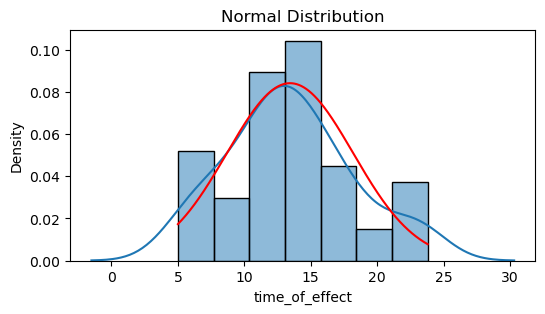

In [9]:
# Getting the mean and std of the data
mean = df.time_of_effect.mean()
std = df.time_of_effect.std()
print("The estimated mean is", round(mean, 2))
print("The estimated standard deviation is", round(std, 2))

# Creating a normal distribution with the mean and std
normal = stats.norm(mean, std)
density = pd.DataFrame() 
density["x"] = np.linspace(df.time_of_effect.min(), df.time_of_effect.max(), 100000) 
density["pdf"] = normal.pdf(density["x"])

# plot the distribution of data using histogram
fig, ax = plt.subplots(figsize = (6, 3)) 
sns.histplot(df.time_of_effect, ax=ax, kde=True, stat="density", kde_kws=dict(cut=3)) # data
ax.plot(density.x, density.pdf, color="red") # normal distribution
plt.title("Normal Distribution") 
plt.show() 

* We can observe from the above plot that the shape of the distribution is not perfectly normal because we have just 50 observations in the sample. But, we can assume this data distribution to be normal and perform our calculations based on the normality assumption.

In [10]:
# a) What is the probability that the time of effect is less than 11.5 hours?
prob = normal.cdf(11.5)
print(f'The probability that the time of effect is less than 11.5hrs is {prob:.4f}')

The probability that the time of effect is less than 11.5hrs is 0.3412


In [11]:
# b) What is the 90th percentile of time of effect for the doses?
time_ppf = normal.ppf(0.90)
print(f'The 90th percentile of time of effect is {time_ppf:.2f} hrs.')

The 90th percentile of time of effect is 19.52 hrs.


In [12]:
# c) For the effectiveness test of the vaccine, estimate the range which will contain the 
#    population mean (time of effect) with a 95% confidence level.

x_bar, s = mean, std # set the values of sample mean and sample standard deviation
n = 50               # set the value of sample size 
k = n - 1            # set the value of degrees of freedom
ci = 0.95            # Set the confidence level

# construct the confidence interval
np.round(stats.t.interval(ci, df=k, loc=x_bar, scale=s / np.sqrt(n)), 2) # last parameter: # of decimals.

array([12.09, 14.79])

**With a 95% confidence level, we can say that the interval [12.09, 14.79] will contain the population mean of the effective time for doses.**